In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [2]:
import kagglehub
path = kagglehub.dataset_download("hemajitpatel/superheros-abilities-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/superheros-abilities-dataset


In [3]:
data_path = '/kaggle/input/superheros-abilities-dataset/superhero_abilities_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

In [4]:
display(df.head())

,Name,Universe,Alignment,Strength,Speed,Intelligence,Combat Skill,Weapon,Power Score,Popularity Score
0,Iron Man #1,Marvel,Anti-Hero,1.0,1.0,2.0,5,Sword,65,40
1,Batman #1,DC,Anti-Hero,5.0,4.0,6.0,2,Shield,94,98
2,Joker #1,Marvel,Hero,3.0,9.0,2.0,5,Hammer,62,40
3,Thor #1,Marvel,Hero,1.0,6.0,2.0,8,Claws,83,91
4,Thanos #1,Marvel,Villain,4.0,3.0,2.0,9,Claws,78,77


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              200 non-null    object 
 1   Universe          200 non-null    object 
 2   Alignment         200 non-null    object 
 3   Strength          190 non-null    float64
 4   Speed             190 non-null    float64
 5   Intelligence      190 non-null    float64
 6   Combat Skill      200 non-null    int64  
 7   Weapon            171 non-null    object 
 8   Power Score       200 non-null    int64  
 9   Popularity Score  200 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ KB


None

In [6]:
display(df.describe())

,Strength,Speed,Intelligence,Combat Skill,Power Score,Popularity Score
count,190.000000,190.000000,190.000000,200.000000,200.0000,200.000000
mean,5.668421,5.352632,5.568421,5.385000,71.4200,50.985000
std,3.036036,2.907183,2.915576,2.843802,18.4201,29.474029
min,1.000000,1.000000,1.000000,1.000000,40.0000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,54.0000,26.750000
50%,5.000000,5.000000,6.000000,5.000000,73.0000,49.000000
75%,8.000000,8.000000,8.000000,8.000000,88.0000,77.250000
max,10.000000,10.000000,10.000000,10.000000,100.0000,100.000000


In [7]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
display(missing_values)

Missing values in each column:


,0
Name,0
Universe,0
Alignment,0
Strength,10
Speed,10
Intelligence,10
Combat Skill,0
Weapon,29
Power Score,0
Popularity Score,0


In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print('Missing values after imputation:')
display(df.isnull().sum())

Missing values after imputation:


,0
Name,0
Universe,0
Alignment,0
Strength,0
Speed,0
Intelligence,0
Combat Skill,0
Weapon,0
Power Score,0
Popularity Score,0


Numeric columns:  ['Strength', 'Speed', 'Intelligence', 'Combat Skill', 'Power Score', 'Popularity Score']


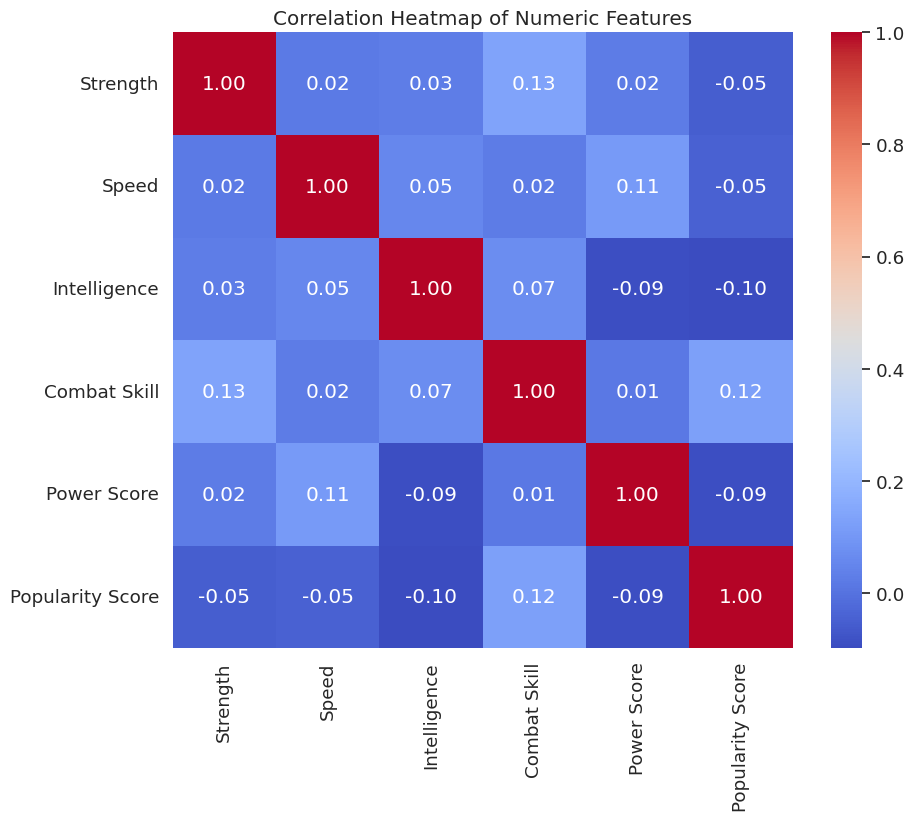

In [9]:
import matplotlib.ticker as ticker
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric columns: ', list(numeric_df.columns))
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

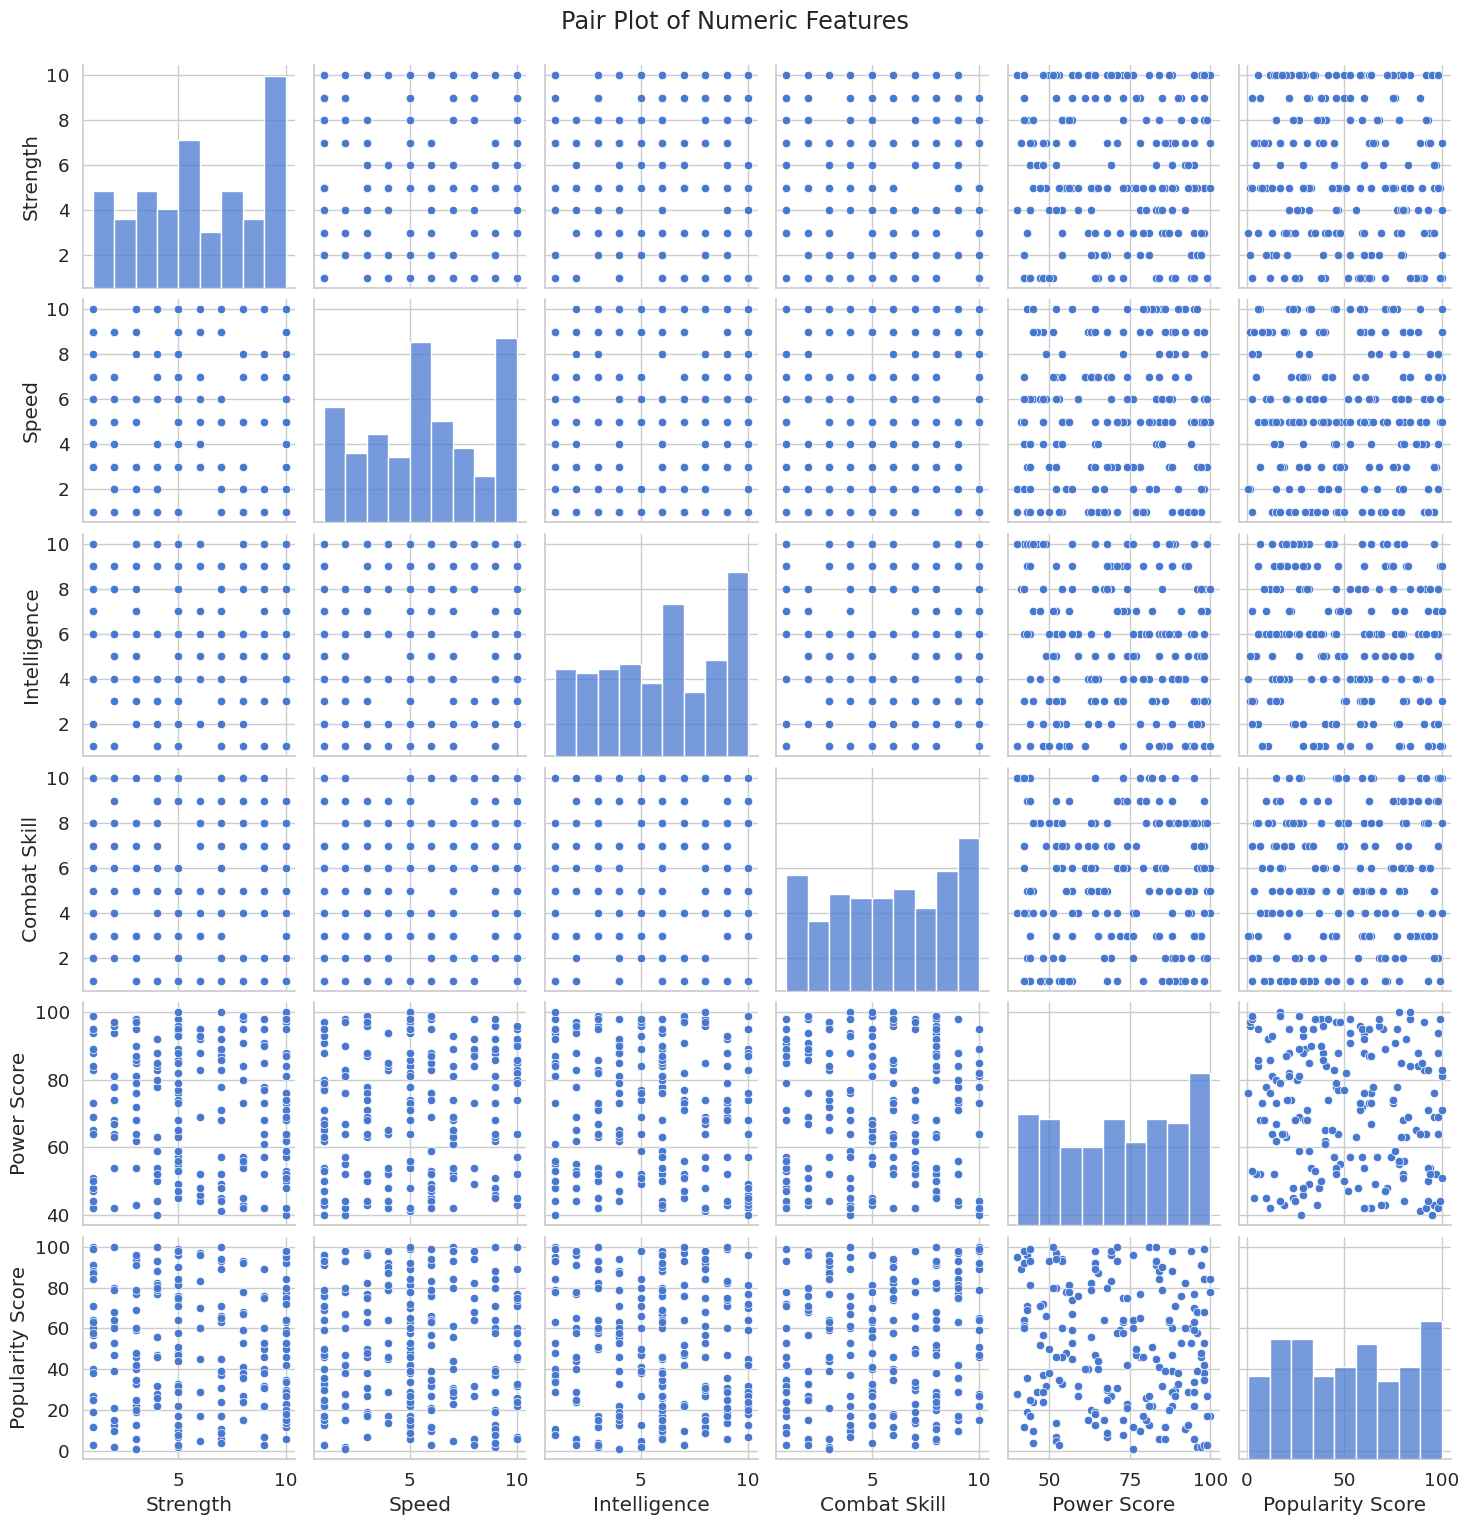

In [10]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

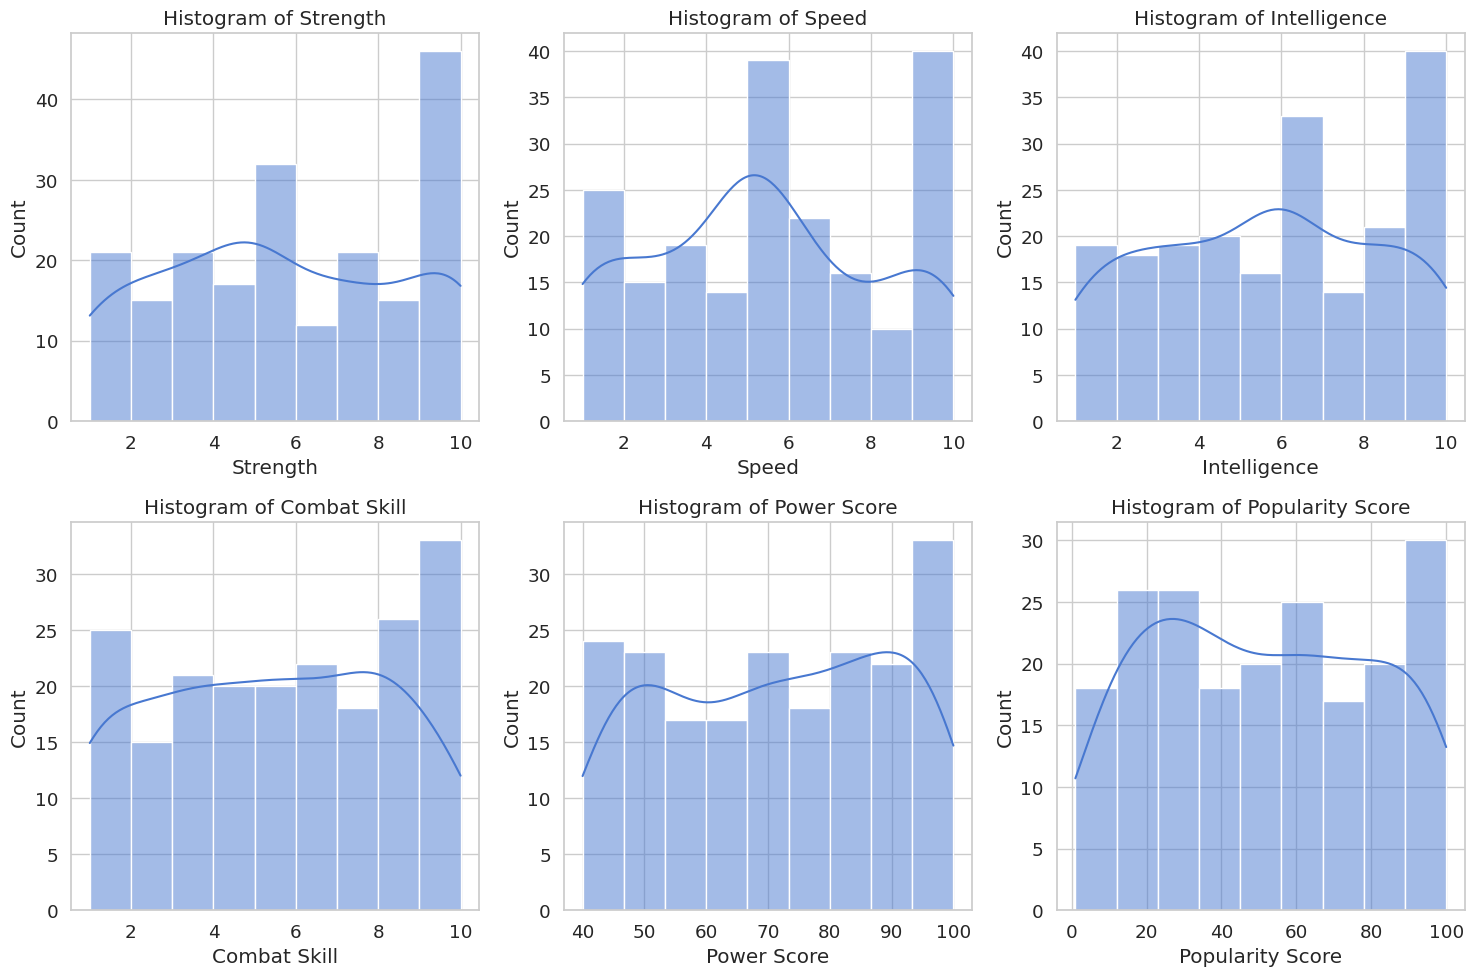

In [11]:
numeric_cols = numeric_df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

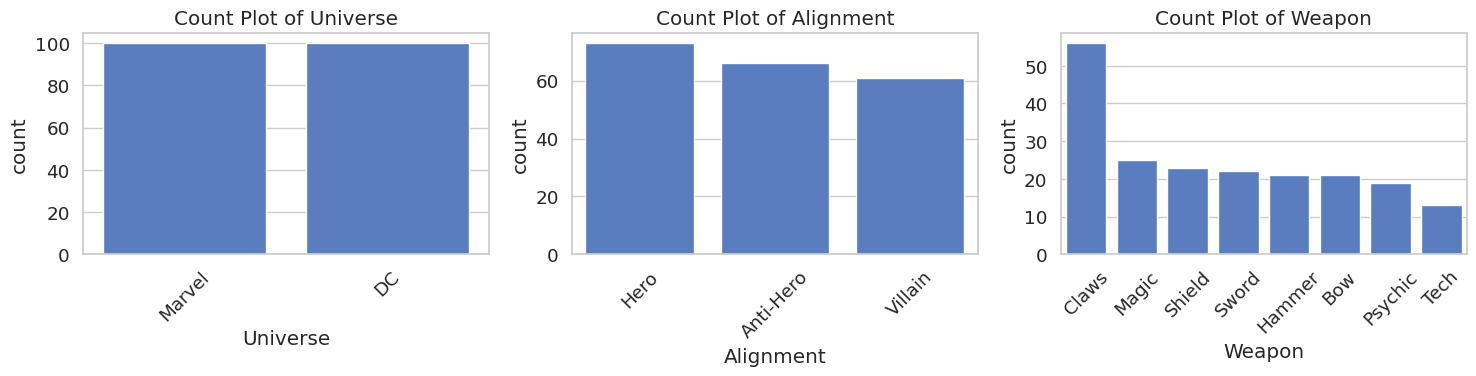

In [12]:
categorical_cols = ['Universe', 'Alignment', 'Weapon']
plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

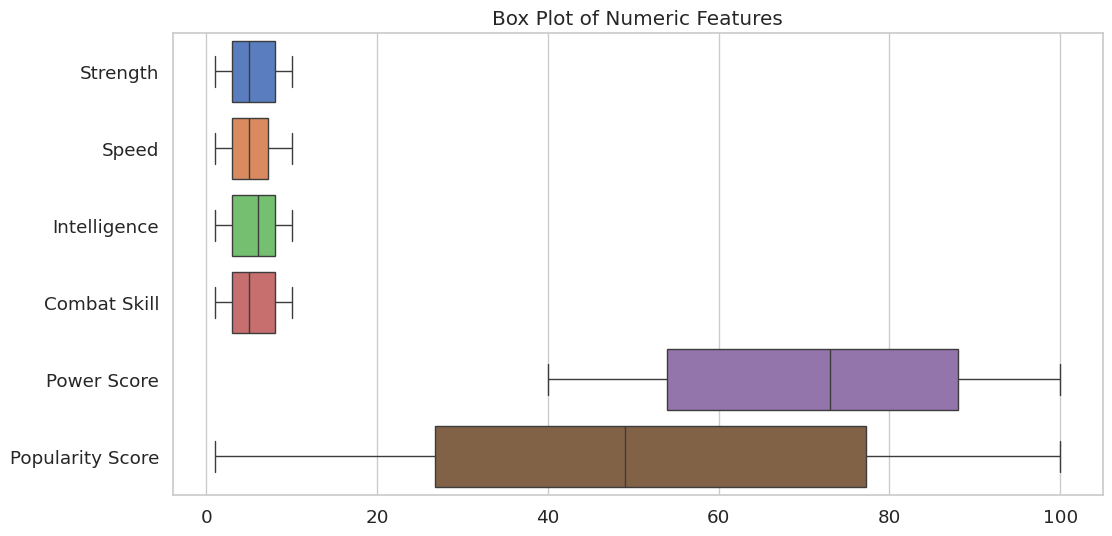

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient='h')
plt.title('Box Plot of Numeric Features')
plt.show()

In [14]:
features = ['Strength', 'Speed', 'Intelligence', 'Combat Skill']
target = 'Power Score'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

R-squared Score: -0.007
Mean Squared Error: 341.445


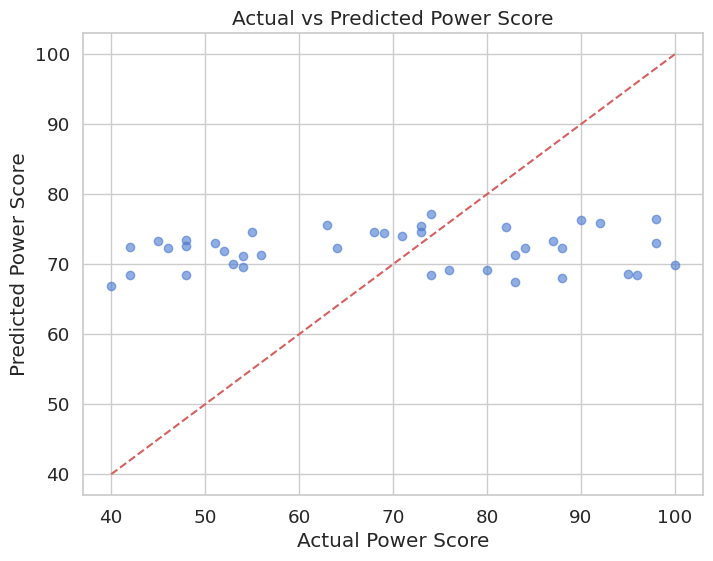

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Power Score')
plt.ylabel('Predicted Power Score')
plt.title('Actual vs Predicted Power Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

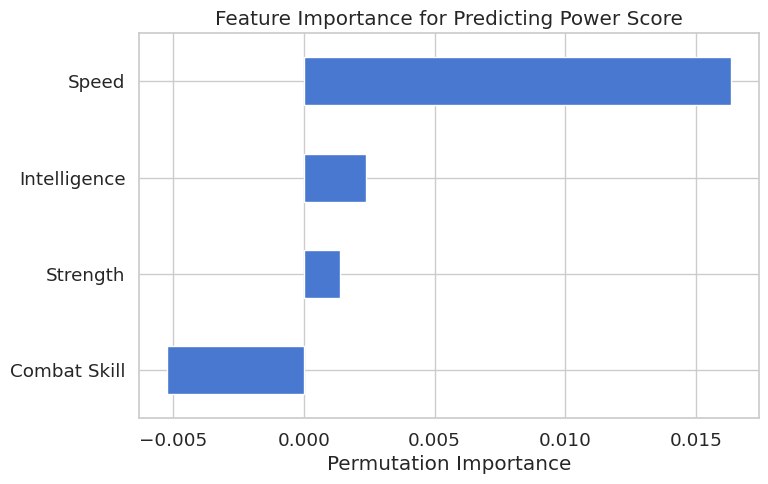

In [18]:
result = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.Series(result.importances_mean, index=features)
plt.figure(figsize=(8, 5))
importance.sort_values().plot(kind='barh')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for Predicting Power Score')
plt.show()

In [19]:
!pip install gradio

In [21]:
import gradio as gr
def predict_power(strength, speed, intelligence, combat):
    input_data = np.array([[strength, speed, intelligence, combat]])
    prediction = lr.predict(input_data)[0]
    return round(prediction, 2)
inputs = [
    gr.Slider(0, 10, label="Strength"),
    gr.Slider(0, 10, label="Speed"),
    gr.Slider(0, 10, label="Intelligence"),
    gr.Slider(0, 10, label="Combat Skill")
]
output = gr.Number(label="Predicted Power Score")
interface = gr.Interface(
    fn=predict_power,
    inputs=inputs,
    outputs=output,
    title="Superhero Power Predictor",
    description="Enter superhero abilities to predict their overall power score using a trained Linear Regression model."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b873d08b3638189df9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
